## Naive Bayes

#### Bernoulli Naive Bayes: binary features

#### Multinomial Naive Bayes: discrete features

#### Gaussian Naive Bayes: continuous features 


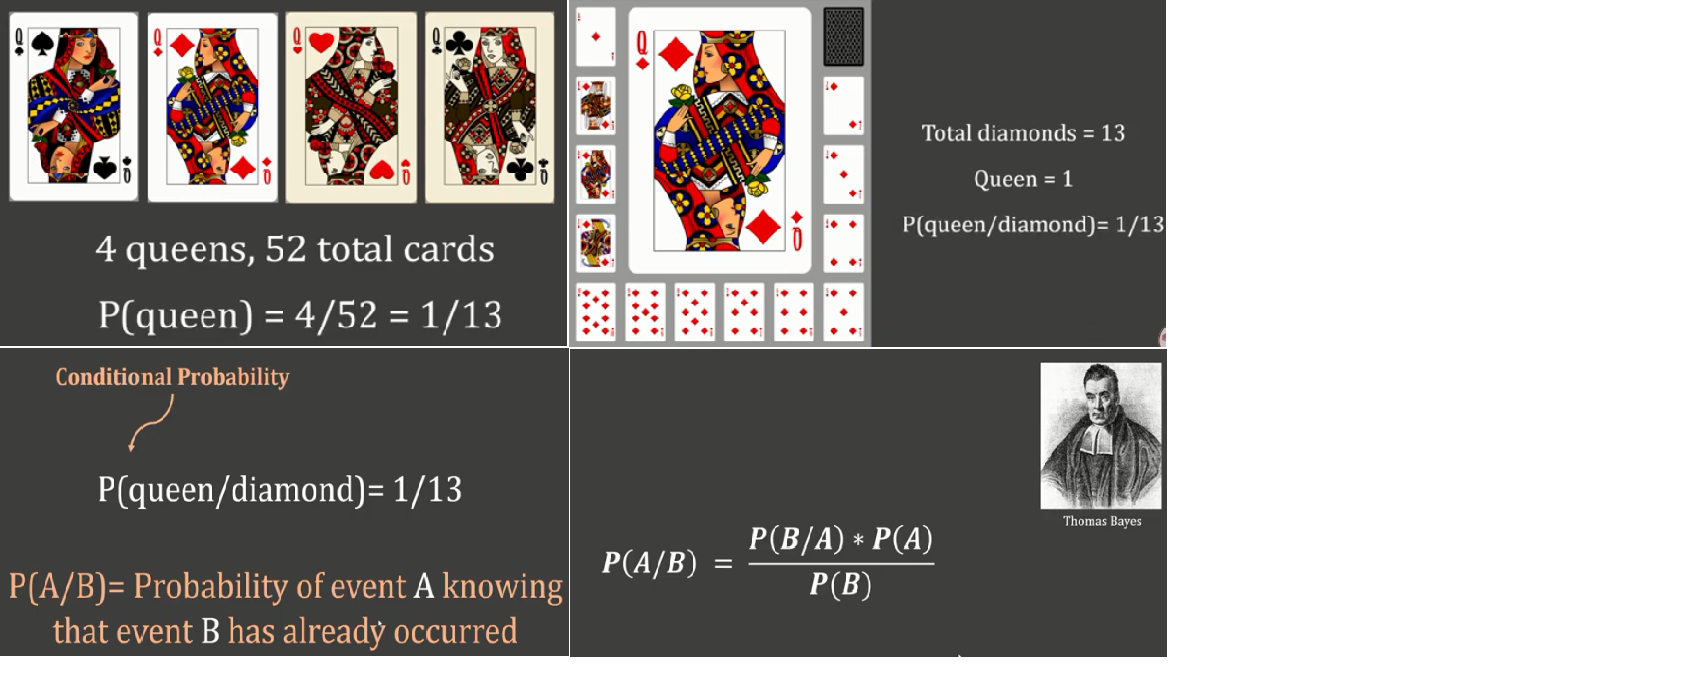

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df1 = df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis="columns")

In [4]:
df1

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [5]:
X = df1.drop("Survived",axis=1)
y = df1.Survived
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [6]:
dummies = pd.get_dummies(X.Sex, dtype=int)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [7]:
X=pd.concat([X,dummies],axis="columns")
X

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [8]:
X = X.drop(["Sex","male"],axis=1)
X

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
...,...,...,...,...
886,2,27.0,13.0000,0
887,1,19.0,30.0000,1
888,3,NaN,23.4500,1
889,1,26.0,30.0000,0


In [9]:
X.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
dtype: int64

In [10]:
X.columns[X.isna().any()]

Index(['Age'], dtype='object')

In [11]:
X.Age = X.Age.fillna(X.Age.mean())
X.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### Gaussian Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(x_train,y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [14]:
model.score(x_test,y_test)

0.7761194029850746

In [15]:
x_test[0:10]

,Pclass,Age,Fare,female
709,3,29.699118,15.2458,0
439,2,31.000000,10.5000,0
840,3,20.000000,7.9250,0
720,2,6.000000,33.0000,1
39,3,14.000000,11.2417,1
290,1,26.000000,78.8500,1
300,3,29.699118,7.7500,1
333,3,16.000000,18.0000,0
208,3,16.000000,7.7500,1
136,1,19.000000,26.2833,1


In [16]:
y_test[0:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [17]:
model.predict(x_test[0:10])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [18]:
model.predict_proba(x_test[0:10])

array([[0.96936275, 0.03063725],
       [0.93717177, 0.06282823],
       [0.96222728, 0.03777272],
       [0.15327261, 0.84672739],
       [0.3768726 , 0.6231274 ],
       [0.02067746, 0.97932254],
       [0.46303706, 0.53696294],
       [0.95888508, 0.04111492],
       [0.38848423, 0.61151577],
       [0.08683721, 0.91316279]])

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),x_train,y_train,cv=5)

array([0.752     , 0.864     , 0.704     , 0.74193548, 0.80645161])

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test[0:10],model.predict(x_test[0:10])))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



#### Multinomial Naive Bayes

In [21]:
df2 = pd.read_csv("Lesson25-spam_ham_dataset.csv")
df2

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [22]:
df2 = df2.drop(df2.columns[[0,1]],axis="columns")
df2

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [23]:
df2.groupby("label_num").describe()

text                                                               
          count unique                                                top freq
label_num                                                                     
0          3672   3531  Subject: calpine daily gas nomination\r\n>\r\n...   20
1          1499   1462                                      Subject: \r\n   16

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df2.text,df2.label_num)

In [25]:
x_train

4710    Subject: re : richardson volumes nov 99 and de...
3968    Subject: naturally busty helen . . fickle\r\nt...
745     Subject: deaden rickets shiplap lifelong doree...
4451    Subject: walter o & g / superior april noms\r\...
2688    Subject: enron / hpl nom for november 22 , 200...
                              ...                        
891     Subject: human viruses blown away ! ! !\r\nthe...
4381    Subject: txu noms . for 10 / 14 - 16 / 00\r\na...
4315    Subject: cornhusker\r\nhi darrin ,\r\nthis is ...
551     Subject: goldston outage\r\nper kevin at golds...
136     Subject: re : tuesday , december 26 th\r\ni wi...
Name: text, Length: 3878, dtype: object

#### CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
x_train_T = v.fit_transform(x_train.values)
x_train_T.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3, 42721))

In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_T,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [28]:
emails = [
    "Hey mohan, can we get together to watch football game tomorrow?",
    "Upto 20% discount on parking, exclusive offer just for you. Don't miss this reward!"
]

emails_T = v.transform(emails)
model.predict(emails_T)

array([0, 1])

In [29]:
x_test_T = v.transform(x_test)
model.score(x_test_T,y_test)

0.9752513534416086

#### sklearn pipeline to replace tranform and simplify the data preprocessing

In [30]:
from sklearn.pipeline import Pipeline

clf = Pipeline([("vectorizer",CountVectorizer()),
               ("nb",MultinomialNB())])

clf.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vectorizer', ...), ('nb', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (strip_accents and lowercase) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [31]:
clf.score(x_test,y_test)

0.9752513534416086

In [51]:
email = [
    "Hey mohan, can we get together to watch football game tomorrow?",
    "Upto 20% discount on parking, exclusive offer just for you. Don't miss this reward!",
    "dont miss these coupons",
    "you are qualified for a reward",
    "hot deals and rewards here, simply register and call us",]

In [52]:
clf.predict(email)

array([0, 1, 1, 1, 0])